LIZ ILEANA RODRIGUEZ 

18/02/2023

In [11]:
# importando modulos necesarios

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import gmean, hmean, trim_mean, uniform, norm

**¿Por qué es importante conocer las distribuciones?**

Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general a partir del estudio de una muestra de esta población. Este proceso se conoce como inferencia estadística; y este tipo de inferencia con frecuencia se basa en hacer suposiciones acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las distribuciones conocidas y estudiadas en profundidad.

Las distribuciones de probabilidad teóricas son útiles en la inferencia estadística porque sus propiedades y características son conocidas. Si la distribución real de un conjunto de datos dado es razonablemente cercana a la de una distribución de probabilidad teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la distribución teórica.

Hay muchas distribuciones de probabilidad, pero aquí hablaremos de las más comunes y usadas. Pero primero, necesitamos comprender las funciones de probabilidad para variables aleatorias continuas.

Las distribuciones se pueden clasificar en dos grandes grupos:

Distribuciones Continuas: son aquellas que presentan un número infinito de posibles soluciones. Dentro de este grupo vamos a encontrar a las distribuciones:

Normal (o Gaussiana)
Log-Normal
Exponencial
Chi Cuadrada
t-Student
etc...

Distribuciones Discretas: son aquellas en las que la variable puede tomar un número determinado de valores. Los principales exponentes de este grupo son las distribuciones:

Poisson
Binomial
Geométrica
Bernoulli
etc...



# Graficando distribuciones

Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un histograma, que es un gráfico que muestra la frecuencia de cada valor.

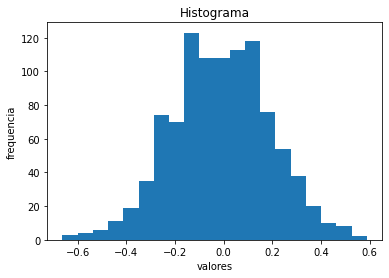

In [12]:
np.random.seed(2016) # replicar random

# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()


**Distribuciones continuas**
En esta sección, como sugiere el título, investigamos distribuciones probabilísticas de variables aleatorias continuas, es decir, variables aleatorias cuyo soporte contiene un rango infinito de posibles resultados.

**Distribución uniforme**
Es un tipo de distribución de probabilidades donde todos los resultados son igualmente probables; cada variable tiene la misma probabilidad de que sea el resultado.

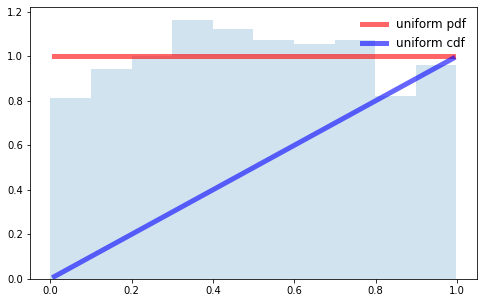

In [13]:
from scipy.stats import uniform
def uniform2():
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    #Definimos lineas auxiliares para mostrar pdf y cdf
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
    ax.plot(x, uniform.cdf(x), 'b-', lw=5, alpha=0.6, label='uniform cdf')
    vals = uniform.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

    #TLC n -> infinito 
    r = uniform.rvs(size=1000)
    ax.hist(r, density =True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False, fontsize=12)
    plt.show()

uniform2()

**Distribución Normal (Gaussiana)**
La distribución normal es una de las principales distribuciones, ya que es la que con más frecuencia aparece aproximada en los fenómenos reales.

Tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Con la ayuda de Python y haciendo uso de matplot (ver la siguiente liga para mayor información de la paquetería de matplotlib) la podemos graficar de la siguiente manera:

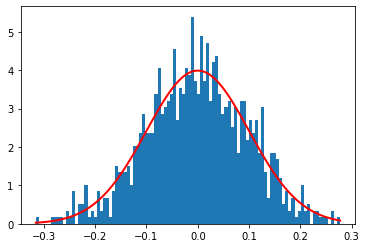

In [14]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

cuenta, cajas, ignorar = plt.hist(s, 100, density=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

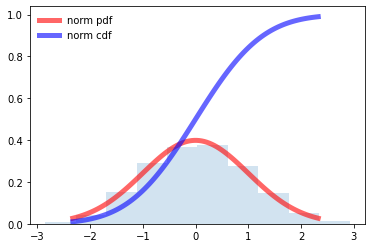

In [15]:
def normal():
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(norm.ppf(0.01),  norm.ppf(0.99), 100)
    ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
    ax.plot(x, norm.cdf(x),'b-', lw=5, alpha=0.6, label='norm cdf')
    vals = norm.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

    r = norm.rvs(size=1000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()

normal()

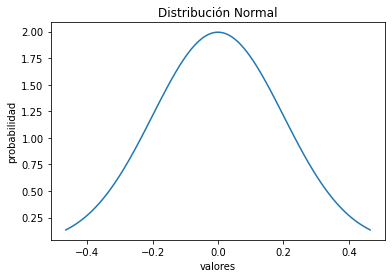

In [16]:
from scipy import stats
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribución Log-Normal**
La Distribución Log-normal esta dada por la formula:



 
En dónde la variable X>0 y los parámetros MIU y desviacion estandar >0
 y 
 son todos números reales. La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribución con asimetría positiva. Algunos de los ejemplos en que la solemos encontrar son:

El peso de los adultos.
La concentración de los minerales en depósitos.
Duración de licencia por enfermedad.
Distribución de riqueza
Tiempos muertos de maquinarias.

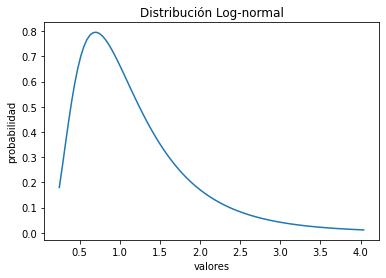

In [17]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribución Exponencial**

La Distribución Exponencial esta dada por la formula:
 
 

En dónde tanto la variable x como el parámetro de alfa son números reales positivos. La Distribución Exponencial tiene bastantes aplicaciones, tales como la desintegración de un átomo radioactivo o el tiempo entre eventos en un proceso de Poisson donde los acontecimientos suceden a una velocidad constante.

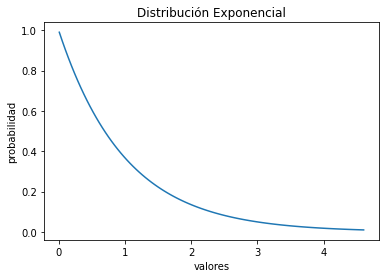

In [18]:
# Graficando Exponencial
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribución Chi Cuadrada**

La Distribución Chi cuadrado esta dada por la función: 
  
 
 

En dónde la variable x >=0 y el parámetro n, el número de grados de libertad, es un número entero positivo. Una importante aplicación de la Distribución Chi cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

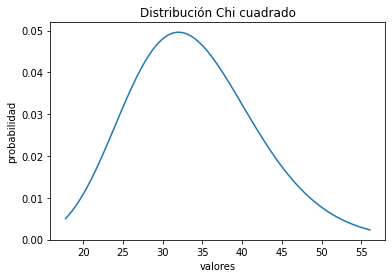

In [19]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribución T de Student**
La Distribución t de Student es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa.

Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

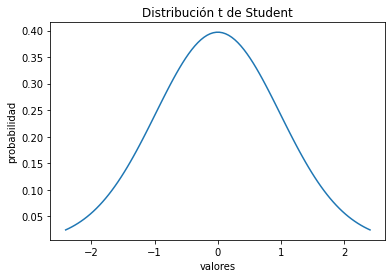

In [20]:
# Graficando t de Student
df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribuciones Discretas**

**Distribución Poisson**
La Distribución Poisson esta dada por la formula:

En dónde r es un entero (r>=0) y MIU es un número real positivo. La Distribución Poisson describe la probabilidad de encontrar exactamente r eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante MIU.

Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios.
En Python la podemos generar fácilmente con la ayuda de scipy.stats, paquete que utilizaremos para representar a todas las restantes distribuciones a lo largo de todo el bloque.

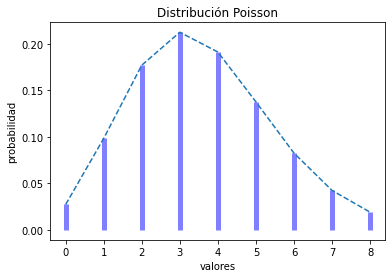

In [21]:
# Graficando Poisson
mu =  3.6 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribución Binomial**

La Distribución Binomial esta dada por la formula:

En dónde r con la condición 0<=r<=N y el parámetro N (N>0) son enteros; y el parámetro p ( 0<=p<=1) es un número real. La Distribución Binomial describe la probabilidad de exactamente r éxitos en N pruebas si la probabilidad de éxito en una sola prueba es p.

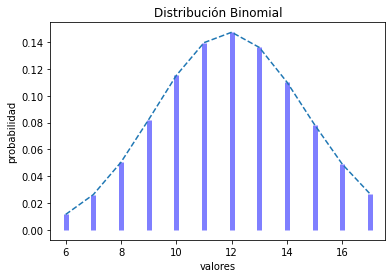

In [22]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**2.4.4.3. Distribución Geométrica**

La Distribución Geométrica esta dada por la formula:

En dónde r>= 1 y el parámetro p (0<=p<=1) es un número real. La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente r pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es p. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

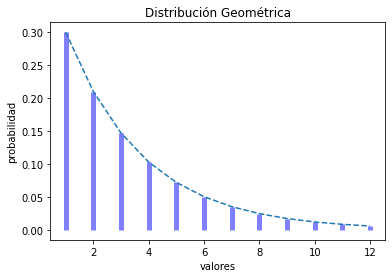

In [23]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**Distribución Bernoulli**

La Distribución de Bernoulli esta dada por la formula: 


En dónde el parámetro p es la probabilidad de éxito en un solo ensayo, la probabilidad de fracaso por lo tanto va a ser 1-p (muchas veces expresada como q). Tanto p como q van a estar limitados al intervalo de cero a uno. La Distribución de Bernoulli describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta distribución se pueden deducir varias Funciones de Densidad de Probabilidad de otras distribuciones que se basen en una serie de ensayos independientes.

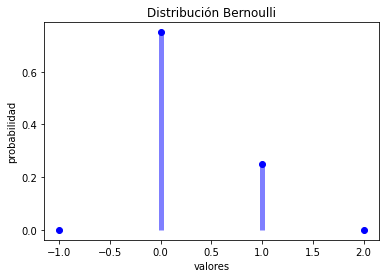

In [24]:
# Graficando Bernoulli
p =  0.25 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

¿Cómo elegir la distribución que mejor se ajusta a mis datos?
Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos.

La primer pregunta se refiere a si los datos pueden tomar valores discretos o continuos.
La segunda pregunta que nos debemos hacer, hace referencia a la simetría de los datos y si hay asimetría, en qué dirección se encuentra; en otras palabras, son los valores atípicos positivos y negativos igualmente probables o es uno más probable que el otro.
La tercer pregunta abarca los límites superiores e inferiores en los datos; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%).
La última pregunta se refiere a la posibilidad de observar valores extremos en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia. Este proceso, lo podemos resumir como

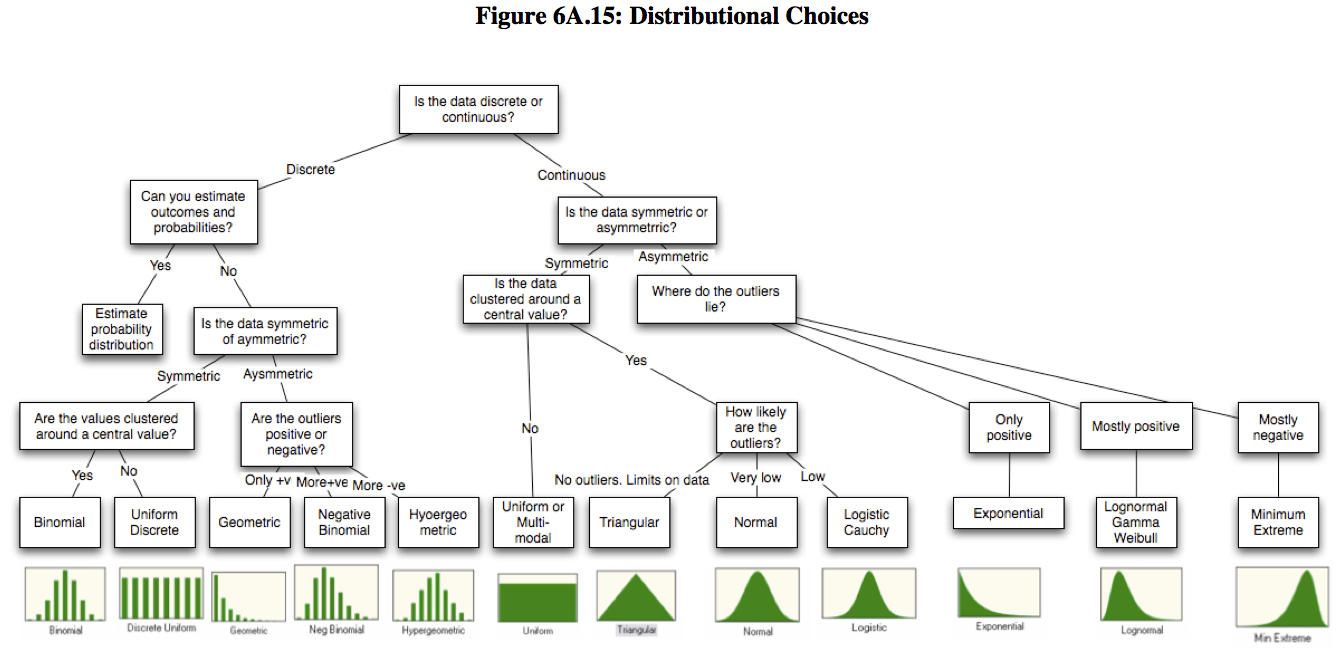

**Distribuciones simetricas y asimetricas**

Una distribución es simétrica cuando moda, mediana y media coinciden aproximadamente en sus valores. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

Una distribución tiene asimetria positiva (o a la derecha) si la "cola" a la derecha de la media es más larga que la de la izquierda, es decir, si hay valores más separados de la media a la derecha. De la misma forma una distribución tiene asimetria negativa (o a la izquierda) si la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda.

Las distribuciones asimétricas suelen ser problemáticas, ya que la mayoría de los métodos estadísticos suelen estar desarrollados para distribuciones del tipo normal. Para salvar estos problemas se suelen realizar transformaciones a los datos para hacer a estas distribuciones más simétricas y acercarse a la distribución normal.

Entrar a la siguiente liga para más información de la función [gama](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).

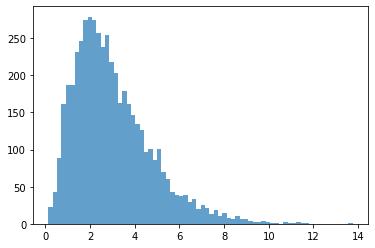

In [25]:
x = stats.gamma(3).rvs(5000)
gamma = plt.hist(x, 70, histtype="stepfilled", alpha=.7)

En este ejemplo podemos ver que la distribución gamma que dibujamos tiene una asimetria positiva. Les recomiendo echarle un vistazo al siguiente [link](https://support.minitab.com/es-mx/minitab/21/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/), para entender un poco mejor la cuestión de la asimetría en los datos.

**¿Qué es una prueba de hipotesis?**

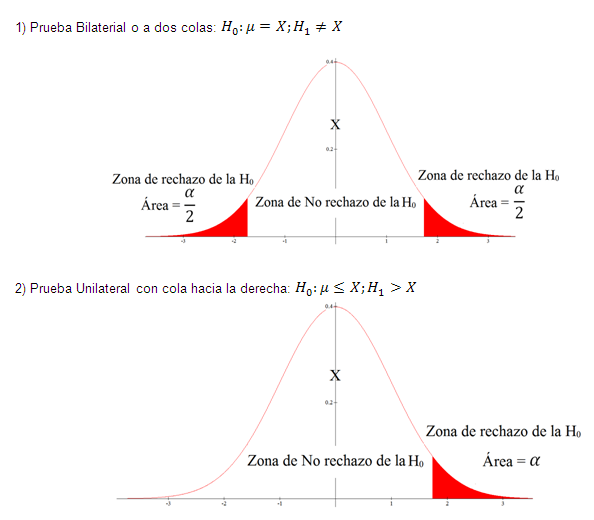

# **Referencias y links de interés**

Algunos conceptos de [estadística](https://towardsdatascience.com/introduction-to-statistics-in-python-6f5a8876c994):

[Tendencia central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central)

[Dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n)

[Distribuciones de probabilidad](https://https://medium.com/@seema.singh/probability-distributions-discrete-and-continuous-7a94ede66dc0)

[Correlaciones](https://https://www.incibe-cert.es/blog/correlacion-herramientas-analisis-datos)

Librería [pydataset](https://pypi.org/project/pydataset/)